In [78]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [79]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [81]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


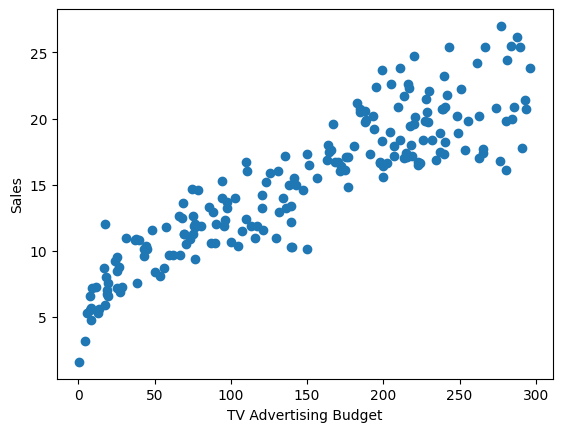

In [82]:
import matplotlib.pyplot as plt

plt.scatter(data['TV'], data['Sales'])
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.show()

In [83]:
X = data[['TV']]  
y = data['Sales']  

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [86]:
model.fit(x_train, y_train)

LinearRegression()

In [87]:
print("Slope:", model.coef_)

Slope: [0.05548294]


In [88]:
print("Intercept:", model.intercept_)

Intercept: 7.007108428241848


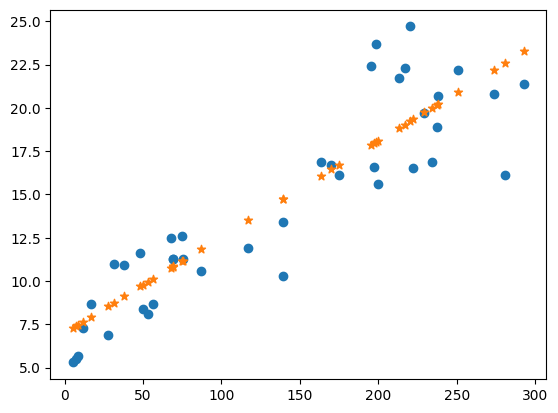

In [89]:
y_pred = model.predict(x_test)
plt.scatter(x_test['TV'], y_test)
plt.scatter(x_test['TV'], y_pred, marker='*')

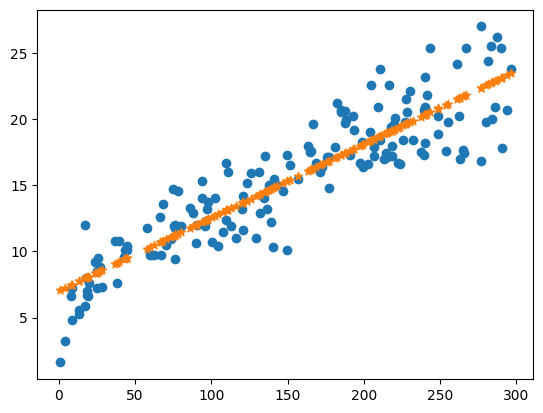

In [90]:
ypred = model.predict(x_train)
plt.scatter(x_train['TV'], y_train)
plt.scatter(x_train['TV'], ypred, marker='*')

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [93]:
mse

6.101072906773963

In [96]:
rmse = root_mean_squared_error(y_train,ypred)
(rmse/y_train.mean())*100

14.583356195086713

In [ ]:
mae

1.9502948931650088

In [ ]:
r2_score(y_train, ypred)

0.8134866044709264

In [ ]:
r2_score(y_test, y_pred)

0.802561303423698

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.802561303423698


In [ ]:
model.score(x_train,y_train)

0.8134866044709264

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Training set metrics
mae_train = mean_absolute_error(y_train, ypred)
mse_train = mean_squared_error(y_train, ypred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, ypred)

# Testing set metrics
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

print("Training Set Performance:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")
print(f"RMSE as % of mean sales: {(rmse_train / y_train.mean()) * 100:.2f}%")

print("\nTesting Set Performance:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")
print(f"RMSE as % of mean sales: {(rmse_test / y_test.mean()) * 100:.2f}%")

print("\nConclusion:")
if r2_test > 0.8:
    print("The model has good predictive power.")
elif r2_test > 0.6:
    print("The model has moderate predictive power.")
else:
    print("The model has low predictive power and may need improvement.")

Training Set Performance:
MAE: 1.80
MSE: 5.00
RMSE: 2.24
R² Score: 0.81
RMSE as % of mean sales: 14.58%

Testing Set Performance:
MAE: 1.95
MSE: 6.10
RMSE: 2.47
R² Score: 0.80
RMSE as % of mean sales: 17.24%

Conclusion:
The model has good predictive power.
